Importing the dependencies

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns

Data collection and processing

In [2]:
#loading the data from csv to pandas dataframe
calories = pd.read_csv('/content/calories.csv')

In [3]:
#print the first 5 rows of dataset
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
exercise = pd.read_csv('/content/exercise.csv')

In [9]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
#concating two dataset
calories_data =  pd.concat([exercise, calories['Calories']], axis=1)

In [11]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
#checking hte number of rows and colums
calories_data.shape

(15000, 9)

In [14]:
#getting more information about dataset
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [16]:
#checking nubmer of missing values
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


Data analysis

In [15]:
#getting some statistical data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data visualization

In [23]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

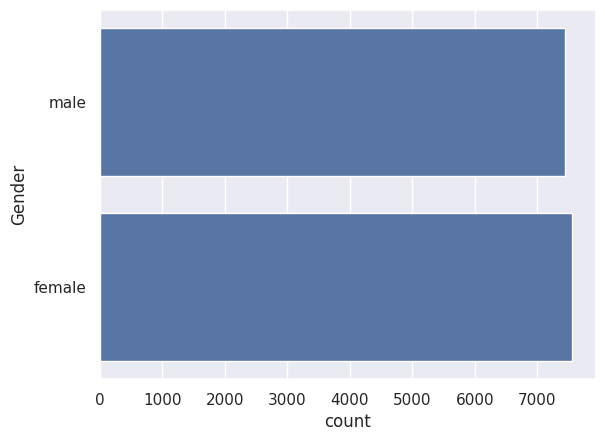

In [25]:
sns.countplot(calories_data['Gender'])
#countplot is very useful for catogorical values

<ipython-input-28-72a9e27c16d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

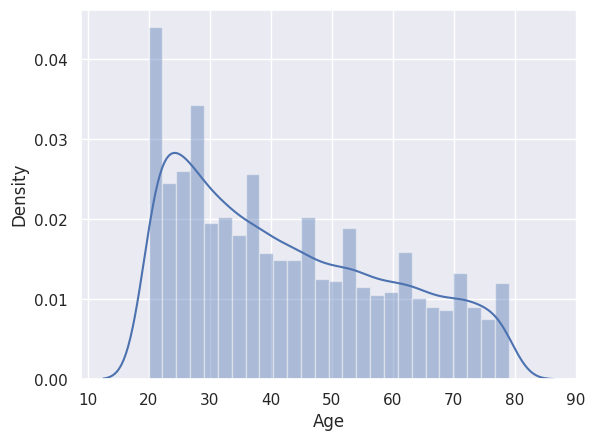

In [28]:
#plotting distribution plot for age column
sns.distplot(calories_data['Age'])

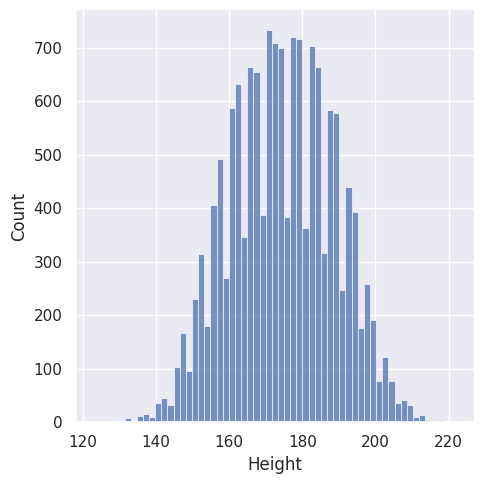

In [30]:
#distribution graph for column height
sns.displot(calories_data['Height'])

<ipython-input-32-5b727c011aa4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

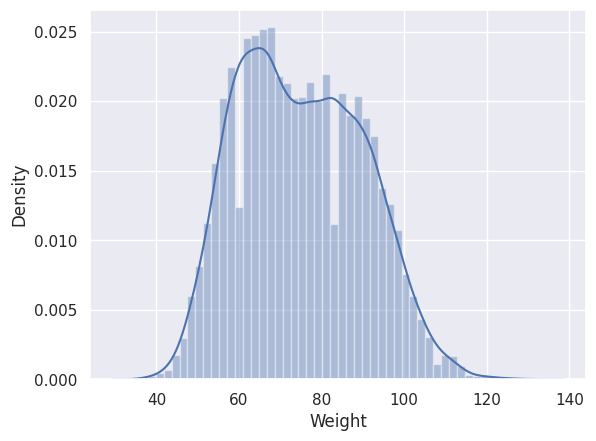

In [32]:
#distribution graph for wieght column
sns.distplot(calories_data['Weight'])

<ipython-input-33-dfcbdbea2601>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

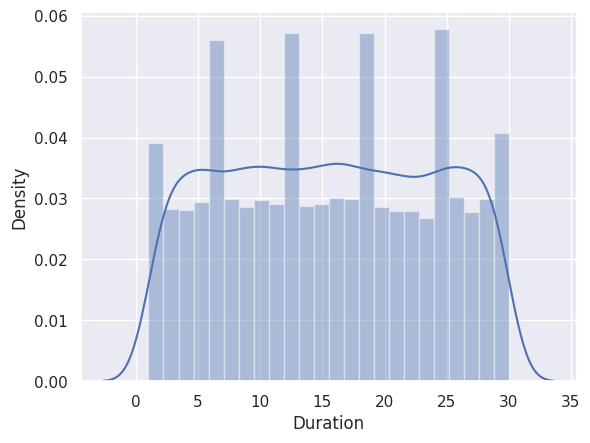

In [33]:
sns.distplot(calories_data['Duration'])

finding the correlation between the data

In [38]:
#converting categorical data(gender) into numerical data
calories_data.replace({'Gender':{'male':1,'female':0}},inplace=True)

<ipython-input-38-942e05338776>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  calories_data.replace({'Gender':{'male':1,'female':0}},inplace=True)


In [39]:
corr=calories_data.corr()

<Axes: >

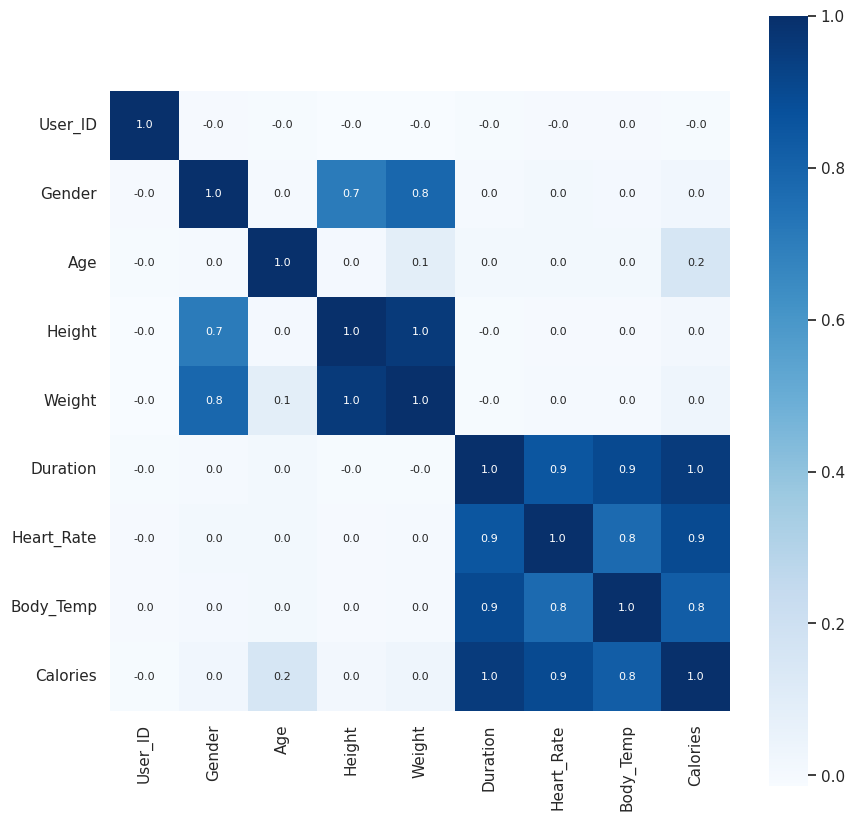

In [41]:
#constructing heatmap
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar=True,square=True, fmt ='.1f', annot=True,annot_kws={'size':8}, cmap='Blues')

seperating features and target

In [42]:
x = calories_data.drop(columns='Calories', axis=1)
y = calories_data['Calories']

In [43]:
print(x,y)

        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363       1   68   190.0    94.0      29.0       105.0       40.8
1      14861698       0   20   166.0    60.0      14.0        94.0       40.3
2      11179863       1   69   179.0    79.0       5.0        88.0       38.7
3      16180408       0   34   179.0    71.0      13.0       100.0       40.5
4      17771927       0   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082       0   20   193.0    86.0      11.0        92.0       40.4
14996  17212577       0   27   165.0    65.0       6.0        85.0       39.2
14997  17271188       0   43   159.0    58.0      16.0        90.0       40.1
14998  18643037       1   78   193.0    97.0       2.0        84.0       38.3
14999  11751526       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns] 0        231.0
1         66.0
2       

splitting training and test data

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [45]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 8) (12000, 8) (3000, 8)


Model training

In [51]:
model= XGBRegressor()

In [53]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation on test data

In [55]:
#prediction on test data
x_test_prediction = model.predict(x_test)

x_test_prediction_accuracy = metrics.r2_score(y_test, x_test_prediction)

print('R squared value',x_test_prediction_accuracy)

R squared value 0.9986806963430097


Mean absolute error

In [57]:
#mean absolute error is the MEAN differnce between actual value and predicted value

mae = metrics.mean_absolute_error(y_test, x_test_prediction)
print('Mean absolute error: ',mae)

Mean absolute error:  1.57148710261782


Predictive system

In [60]:
input_data = (14733363,1,68,190.0,94.0,29.0,105.0,40.8)

input_data_into_array = np.asarray(input_data)

input_data_reshaped = input_data_into_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print("The calories burnt :",prediction)


The calories burnt : [234.34105]
